In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import os
import sys

In [4]:
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [5]:
df = pd.read_csv('../Data/raw_analyst_ratings.csv')

In [6]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [7]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Obtain basic statistics for headline lengths
headline_stats = df['headline_length'].describe()
print(headline_stats)


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [8]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)


publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


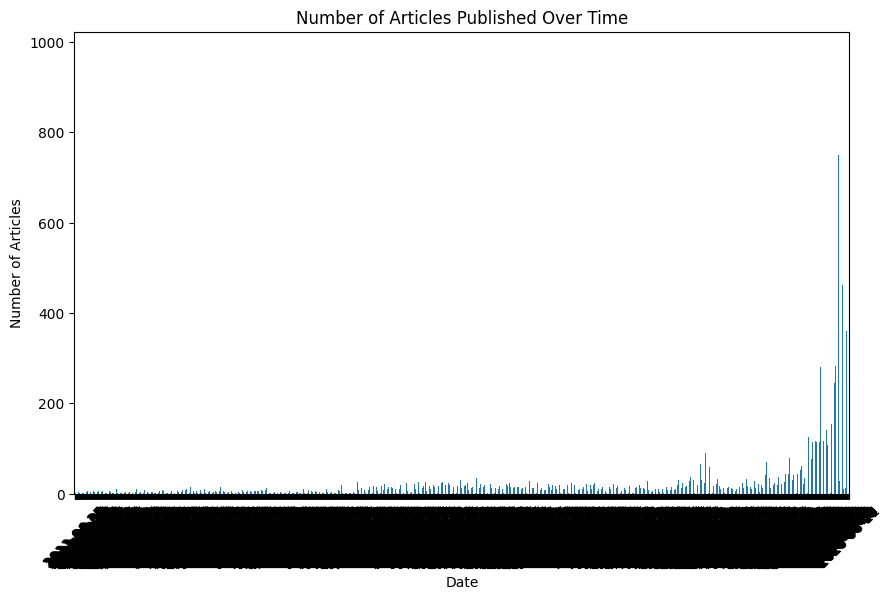

In [9]:
# Extract the date without time
df['date_only'] = df['date'].dt.date

# Count the number of articles per date
date_counts = df['date_only'].value_counts().sort_index()

# Visualize the publication trends over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
date_counts.plot(kind='bar')
plt.title('Number of Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()


In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd

# Download necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Coop\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each headline
df['sentiment_scores'] = df['headline'].apply(lambda headline: sid.polarity_scores(headline))
df['sentiment'] = df['sentiment_scores'].apply(lambda score_dict: 'positive' if score_dict['compound'] >= 0.05 else ('negative' if score_dict['compound'] <= -0.05 else 'neutral'))

# Display the sentiment analysis results
print(df[['headline', 'sentiment', 'sentiment_scores']])


                                                  headline sentiment  \
0                  Stocks That Hit 52-Week Highs On Friday   neutral   
1               Stocks That Hit 52-Week Highs On Wednesday   neutral   
2                            71 Biggest Movers From Friday   neutral   
3             46 Stocks Moving In Friday's Mid-Day Session   neutral   
4        B of A Securities Maintains Neutral on Agilent...  positive   
...                                                    ...       ...   
1407323             Top Narrow Based Indexes For August 29  positive   
1407324  Recap: Wednesday's Top Percentage Gainers and ...  negative   
1407325  UPDATE: Oppenheimer Color on China Zenix Auto ...   neutral   
1407326  Oppenheimer Initiates China Zenix At Outperfor...   neutral   
1407327  China Zenix Auto International Opens For Tradi...   neutral   

                                          sentiment_scores  
0        {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
1        {'ne

In [12]:
# Tokenize headlines into words
df['tokens'] = df['headline'].apply(word_tokenize)

# Remove stopwords and non-alphabetic tokens
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words])

# Flatten the list of tokens to find the most common words across all headlines
all_tokens = [token for tokens in df['filtered_tokens'] for token in tokens]

# Get the frequency distribution of the tokens
freq_dist = nltk.FreqDist(all_tokens)

# Display the most common words
common_words = freq_dist.most_common(10)
print(common_words)


: 

In [ ]:
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder

# Find bigrams in the filtered tokens
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(all_tokens)

# Filter bigrams that appear at least twice
finder.apply_freq_filter(2)

# Find the most common bigrams
common_bigrams = finder.nbest(bigram_measures.pmi, 10)

# Display the most common bigrams
print(common_bigrams)


[('accuri', 'cytometers'), ('adhanom', 'ghebreyesus'), ('akio', 'toyoda'), ('aktiv', 'kapital'), ('alvesco', 'omnaris'), ('amac', 'angn'), ('amedes', 'fetalis'), ('amee', 'chande'), ('amerino', 'gatti'), ('anastassia', 'lauterbach')]


time series

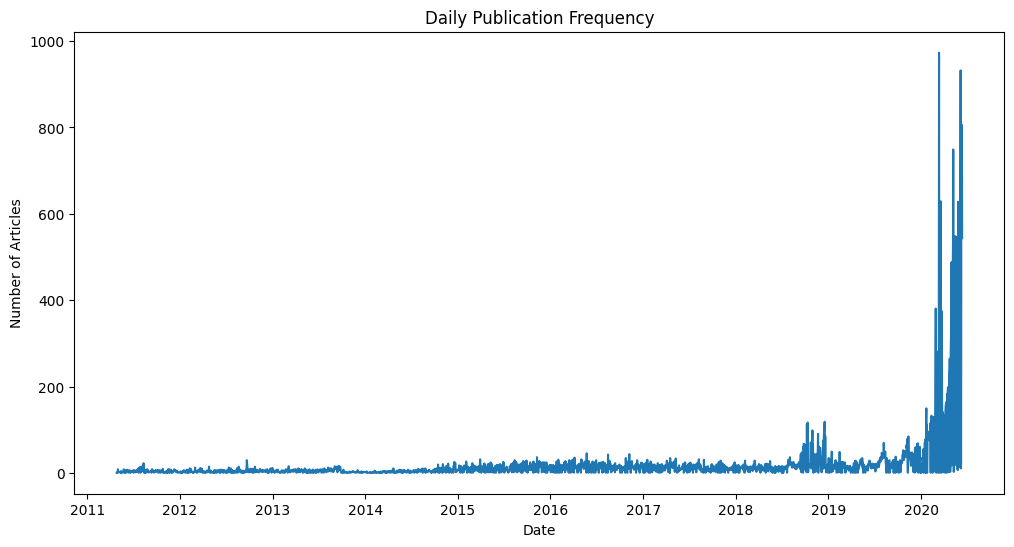

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the date part (without time) for daily aggregation
df['publication_date'] = df['date'].dt.date

# Group by publication date and count the number of articles per day
daily_publication_counts = df.groupby('publication_date').size()

# Plot the publication frequency over time
plt.figure(figsize=(12, 6))
daily_publication_counts.plot()
plt.title('Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


In [ ]:
# Identify dates with significant spikes in publications
threshold = daily_publication_counts.mean() + 2 * daily_publication_counts.std()  # Example threshold
spike_dates = daily_publication_counts[daily_publication_counts > threshold]

# Display spike dates and corresponding publication counts
print("Spike Dates:")
print(spike_dates)


Spike Dates:
publication_date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64


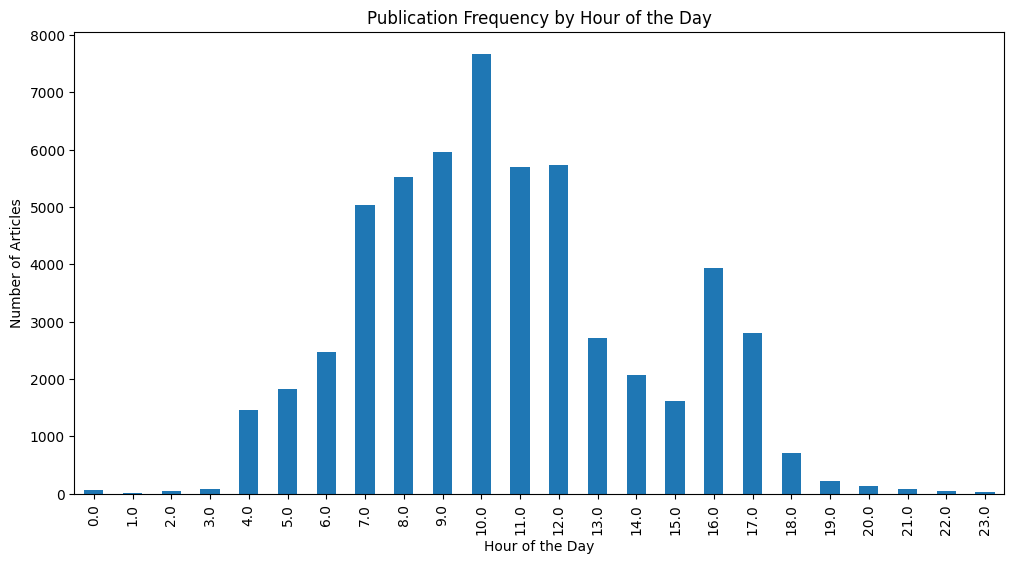

In [ ]:
# Extract the time part from the datetime
df['publication_time'] = df['date'].dt.time

# Group by publication hour
df['publication_hour'] = df['date'].dt.hour
hourly_publication_counts = df.groupby('publication_hour').size()

# Plot the distribution of publication times
plt.figure(figsize=(12, 6))
hourly_publication_counts.plot(kind='bar')
plt.title('Publication Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.show()


publisher

Number of Articles per Publisher:
publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64


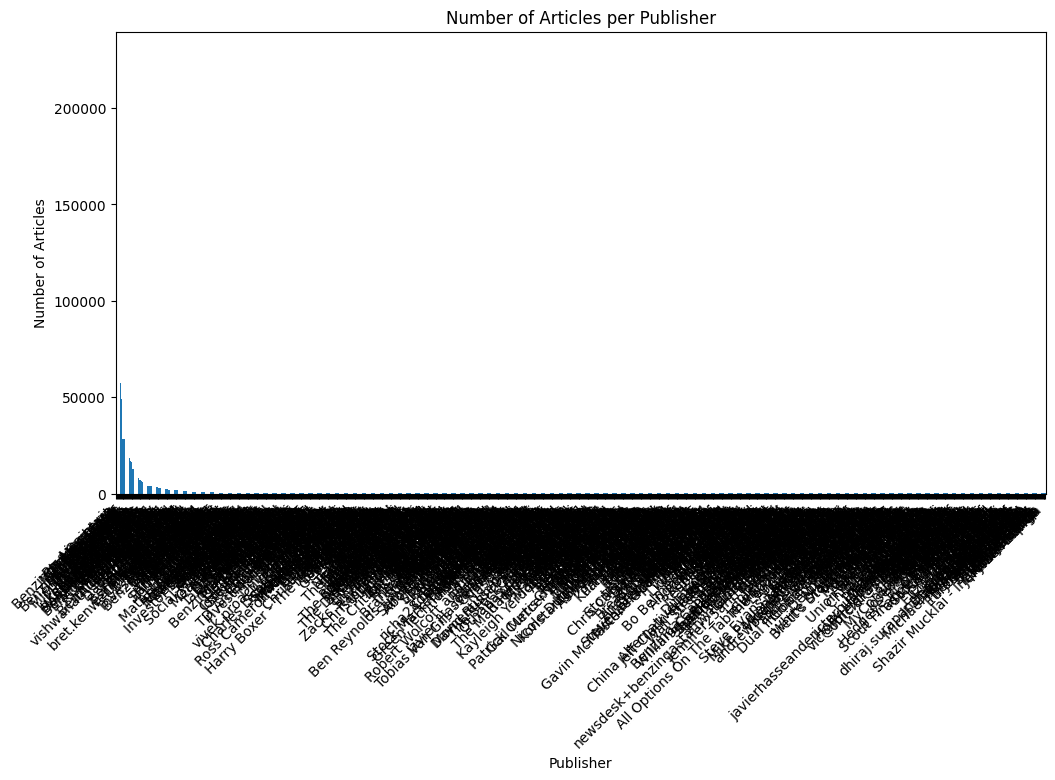

In [ ]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the number of articles per publisher
print("Number of Articles per Publisher:")
print(publisher_counts)

# Plot the number of articles per publisher
plt.figure(figsize=(12, 6))
publisher_counts.plot(kind='bar')
plt.title('Number of Articles per Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Function to get most common words for a publisher
def get_common_words(publisher_headlines):
    tokens = word_tokenize(' '.join(publisher_headlines))
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stopwords.words('english')]
    return Counter(tokens).most_common(10)

# Group headlines by publisher
publisher_headlines = df.groupby('publisher')['headline'].apply(list)

# Get and print common words for each publisher
for publisher, headlines in publisher_headlines.items():
    print(f"\nMost Common Words for Publisher: {publisher}")
    common_words = get_common_words(headlines)
    print(common_words)



Most Common Words for Publisher: 47ertrends
[('saturday', 18), ('february', 18), ('stock', 18), ('market', 18), ('trends', 18)]

Most Common Words for Publisher: AARP
[('ways', 7), ('small', 5), ('businesses', 5), ('get', 5), ('emergency', 5), ('help', 5), ('right', 5), ('earn', 2), ('money', 2), ('home', 2)]

Most Common Words for Publisher: ABNNewswire
[('asx', 11), ('limited', 8), ('nl', 4), ('million', 3), ('celamin', 3), ('holdings', 3), ('cnl', 3), ('update', 3), ('companies', 3), ('projects', 3)]

Most Common Words for Publisher: Aakin
[('much', 4), ('ces', 2), ('report', 2), ('airport', 2), ('security', 2), ('sony', 1), ('ups', 1), ('ante', 1), ('latest', 1), ('dslr', 1)]

Most Common Words for Publisher: Aaron Jackson.Ed
[('week', 15), ('top', 10), ('things', 9), ('read', 9), ('reads', 6), ('best', 5), ('last', 5), ('financial', 4), ('blogosphere', 4), ('momentum', 1)]

Most Common Words for Publisher: Aaron Levitt
[('play', 15), ('emerging', 13), ('market', 13), ('growth', 1

Number of Articles per Domain:
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


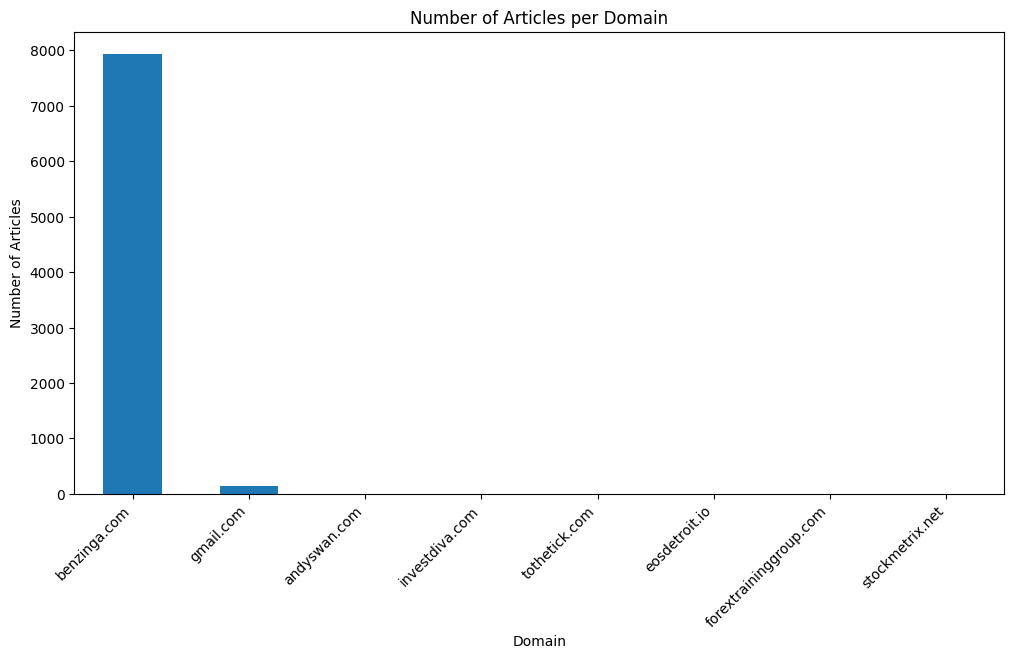

In [ ]:
import re

# Function to extract domain from an email address
def extract_domain(email):
    match = re.search(r'@(.+)', email)
    return match.group(1) if match else None

# Identify email addresses and extract domains
df['domain'] = df['publisher'].apply(lambda publisher: extract_domain(publisher) if '@' in publisher else None)

# Count the number of articles per domain
domain_counts = df['domain'].value_counts()

# Display the number of articles per domain
print("Number of Articles per Domain:")
print(domain_counts)

# Plot the number of articles per domain
plt.figure(figsize=(12, 6))
domain_counts.plot(kind='bar')
plt.title('Number of Articles per Domain')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()
